In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
# Dataset: https://archive.ics.uci.edu/ml/datasets/Iris/
# IRIS Dataset Size: 150 samples
# Train: 70%  Eval: 30%

In [3]:
data_path = r'C:\AWSMLCourse\Data\ClassExamples\Iris'

In [4]:
df = pd.read_csv(os.path.join(data_path,'iris.data.csv'))

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)

In [8]:
l[:5]

[82, 134, 114, 42, 109]

In [9]:
df = df.ix[l]

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,2.7,3.9,1.2,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica


In [13]:
df.to_csv(os.path.join(data_path,'iris_data_train.csv'),index=True,index_label='Row',
columns=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [14]:
df.to_csv(os.path.join(data_path,'iris_data_classifier_test.csv'),index=True,index_label='Row',
          columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [15]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [16]:
setosa = df['class'] == 'Iris-setosa'
versicolor = df['class'] == 'Iris-versicolor'
virginica = df['class'] == 'Iris-virginica'

In [17]:
setosa.head()

82     False
134    False
114    False
42      True
109    False
Name: class, dtype: bool

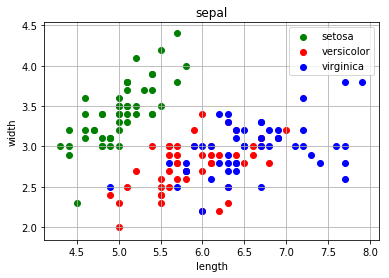

In [18]:
plt.scatter(df[setosa].sepal_length,y=df[setosa].sepal_width, label='setosa',color='g')
plt.scatter(df[versicolor].sepal_length,y=df[versicolor].sepal_width, label='versicolor',color='r')
plt.scatter(df[virginica].sepal_length,y=df[virginica].sepal_width, label='virginica',color='b')
plt.xlabel('length')
plt.ylabel('width')
plt.title('sepal')
plt.grid(True)
plt.legend()

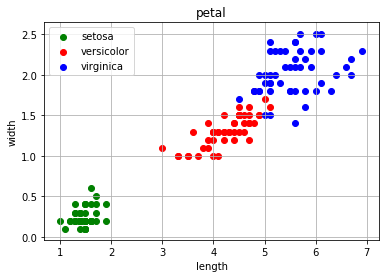

In [19]:
plt.scatter(df[setosa].petal_length,y=df[setosa].petal_width, label='setosa',color='g')
plt.scatter(df[versicolor].petal_length,y=df[versicolor].petal_width, label='versicolor',color='r')
plt.scatter(df[virginica].petal_length,y=df[virginica].petal_width, label='virginica',color='b')
plt.xlabel('length')
plt.ylabel('width')
plt.title('petal')
plt.grid(True)
plt.legend()

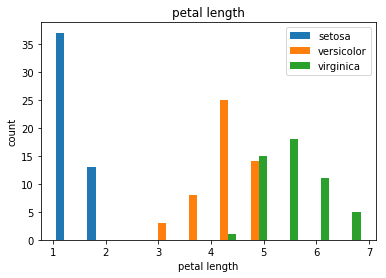

In [20]:
plt.hist([df[setosa].petal_length,df[versicolor].petal_length,df[virginica].petal_length],bins=10,
        label=['setosa','versicolor','virginica'])
plt.title('petal length')
plt.xlabel('petal length')
plt.ylabel('count')
plt.legend()

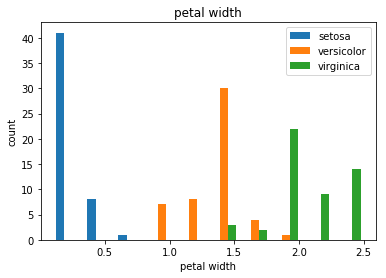

In [21]:
plt.hist([df[setosa].petal_width,df[versicolor].petal_width,df[virginica].petal_width],bins=10,
        label=['setosa','versicolor','virginica'])
plt.title('petal width')
plt.xlabel('petal width')
plt.ylabel('count')
plt.legend()

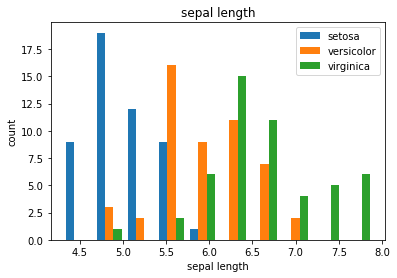

In [22]:
plt.hist([df[setosa].sepal_length,df[versicolor].sepal_length,df[virginica].sepal_length],bins=10,
        label=['setosa','versicolor','virginica'])
plt.title('sepal length')
plt.xlabel('sepal length')
plt.ylabel('count')
plt.legend()

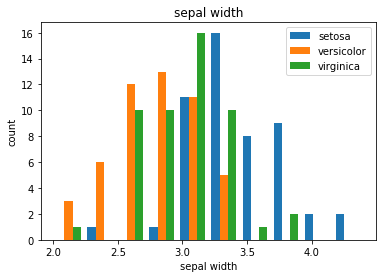

In [23]:
plt.hist([df[setosa].sepal_width,df[versicolor].sepal_width,df[virginica].sepal_width],bins=10,
        label=['setosa','versicolor','virginica'])
plt.title('sepal width')
plt.xlabel('sepal width')
plt.ylabel('count')
plt.legend()

In [24]:
df_predict_default = pd.read_csv(
    os.path.join(
        data_path,
        'output_default',
        'bp-yWqwGrsJKbH-iris_data_classifier_test.csv.gz'))
df_predict_default.index = df_predict_default.tag

In [25]:
df_predict_default.head()

,tag,Iris-virginica,Iris-versicolor,Iris-setosa
tag,,,,
82,82,0.016913,0.981294,0.001793
134,134,0.982991,0.014545,0.002465
114,114,0.995882,0.002825,0.001292
42,42,0.000100,0.001539,0.998361
109,109,0.999258,0.000039,0.000704


In [26]:
def predicted_class(row):
    if row['Iris-setosa'] >= row['Iris-versicolor'] and row['Iris-setosa'] >= row['Iris-virginica']:           
        return "Iris-setosa"
        
    if row['Iris-versicolor'] >= row['Iris-setosa'] and row['Iris-versicolor'] >= row['Iris-virginica']:
        return "Iris-versicolor"
    
    return "Iris-virginica"

In [27]:
lst_predicted=[]
for index, row in df_predict_default.iterrows():
    lst_predicted.append(predicted_class(row))
    
df_predict_default['predicted_default'] = lst_predicted

In [28]:
df_predict_default.head()

,tag,Iris-virginica,Iris-versicolor,Iris-setosa,predicted_default
tag,,,,,
82,82,0.016913,0.981294,0.001793,Iris-versicolor
134,134,0.982991,0.014545,0.002465,Iris-virginica
114,114,0.995882,0.002825,0.001292,Iris-virginica
42,42,0.000100,0.001539,0.998361,Iris-setosa
109,109,0.999258,0.000039,0.000704,Iris-virginica


In [29]:
df_predict_numeric = pd.read_csv(
    os.path.join(
        data_path,
        'output_numeric',
        'bp-2YjhCpcTtDx-iris_data_classifier_test.csv.gz'))
df_predict_numeric.index = df_predict_numeric.tag

In [30]:
lst_predicted=[]
for index, row in df_predict_numeric.iterrows():
    lst_predicted.append(predicted_class(row))
    
df_predict_numeric['predicted_numeric'] = lst_predicted

In [31]:
df_predict_numeric.head()

,tag,Iris-virginica,Iris-versicolor,Iris-setosa,predicted_numeric
tag,,,,,
82,82,0.432319,0.473640,0.094041,Iris-versicolor
134,134,0.695479,0.297776,0.006744,Iris-virginica
114,114,0.776126,0.217024,0.006849,Iris-virginica
42,42,0.020863,0.099928,0.879209,Iris-setosa
109,109,0.766280,0.228180,0.005540,Iris-virginica


In [32]:
print('Confusion matrix - Actual versus prediction with bin recipe')
cf_bin_recipe = pd.crosstab(df['class'],df_predict_default.predicted_default)

Confusion matrix - Actual versus prediction with bin recipe


In [33]:
cf_bin_recipe

predicted_default,Iris-setosa,Iris-versicolor,Iris-virginica
class,,,
Iris-setosa,49,1,0
Iris-versicolor,0,49,1
Iris-virginica,0,2,48


Prediction with default recipe is good

In [34]:
print('Confusion matrix - Actual versus prediction with numeric recipe')
cf_num_recipe = pd.crosstab(df['class'],df_predict_numeric.predicted_numeric)

Confusion matrix - Actual versus prediction with numeric recipe


In [35]:
cf_num_recipe

predicted_numeric,Iris-setosa,Iris-versicolor,Iris-virginica
class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,20,30
Iris-virginica,0,0,50


Versicolor - 30 examples got misclassified as Virginica

In [36]:
def print_metrics(cf_matrix):
    # Note:AWS ML computes all these for you...demo to show how these are calculated.
    
    # Total samples is sum of all columns in each row
    total_samples = cf_matrix.sum(axis=1).sum()
    # Diagonal contains correct class predictions
    accuracy = np.diag(cf_matrix).sum()/total_samples
    
    print('Accuracy: {0:0.3f}'.format(accuracy))
    print('\n')
    
    # TPR, Recall = True Positive/Actual Positive
    recall = np.diag(cf_matrix)/cf_matrix.sum(axis=1)
    print('recall')
    print(recall)
    print('\n')
    
    # Precision = True Positive/Predicted Positive
    precision = np.diag(cf_matrix)/cf_matrix.sum(axis=0)
    print('precision')
    print(precision)
    print('\n')
    
    f1_scores = 2 * recall * precision/(recall+precision)
    print('f1 scores')
    print(f1_scores)
    print('\n')
    
    print('average f1 score {0:0.3f}'.format(f1_scores.mean()))
    print('\n')    

In [38]:
print_metrics(cf_bin_recipe)

Accuracy: 0.973


recall
class
Iris-setosa        0.98
Iris-versicolor    0.98
Iris-virginica     0.96
dtype: float64


precision
predicted_default
Iris-setosa        1.000000
Iris-versicolor    0.942308
Iris-virginica     0.979592
dtype: float64


f1 scores
class
Iris-setosa        0.989899
Iris-versicolor    0.960784
Iris-virginica     0.969697
dtype: float64


average f1 score 0.973




In [39]:
print_metrics(cf_num_recipe)

Accuracy: 0.800


recall
class
Iris-setosa        1.0
Iris-versicolor    0.4
Iris-virginica     1.0
dtype: float64


precision
predicted_numeric
Iris-setosa        1.000
Iris-versicolor    1.000
Iris-virginica     0.625
dtype: float64


f1 scores
class
Iris-setosa        1.000000
Iris-versicolor    0.571429
Iris-virginica     0.769231
dtype: float64


average f1 score 0.780




In [40]:
df_predict_numeric.predicted_numeric.value_counts()

Iris-virginica     80
Iris-setosa        50
Iris-versicolor    20
Name: predicted_numeric, dtype: int64

In [41]:
df_predict_default.predicted_default.value_counts()

Iris-versicolor    52
Iris-virginica     49
Iris-setosa        49
Name: predicted_default, dtype: int64

<h4>Multi-Class Evaluation Metric</h4>
1. F1 Score is a binary classification metric. It is harmonic mean of precision and recall<br>
 F1 Score = 2 X Precision X Recall / (Precision + Recall)<br>
 <b>Higher F1 Score reflects better predictive accuracy<br></b>

2. Multi-Class Evaluation<br>
 Average of class wise F1 Score <br>
 
3. Baseline F1 Score = Hypothetical model that predicts only most frequent class as the answer

4. Visualization - Confusion Matrix - Available on AWS ML Console<br>
Matrix. Rows = true class. Columns = predicted class<br>
Cell color – diagonal indicates true class prediction %<br>
Cell color – non-diagonal indicates incorrect prediction %<br>
Last column is F1 score for that class. Last but one column is true class distribution<br>
Last row is predicted class distribution<br>
Upto 10 classes are shown – listed from most frequent to least frequent<br>
For more than 10 classes, first 9 most freq. classes are shown and 10th class will collapse rest of the classes and mark as other<br>
You can download the confusion matrix thru url - Explore Performance page under Evaluations
<br>


<h4>Prediction Summary</h4>
1. Eval with default recipe settings. <b>Average F1 score: 0.905</b>
2. Eval with numeric recipe settings: <b>Average F1 score: 0.827</b>
3. Batch prediction Results (predict all 150 example outcome):<br>
    a. With default recipe settings: <b>Average F1 Score: 0.973</b><br>
    b. With numeric recipe settings: <b>Average F1 Score: 0.78</b>    
3. Classification was better with binning.  Versicolor classification was impacted when numeric setting was used
4. Higher F1 Score implies better prediction accuracy.